### Importing libraries

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

In [2]:
df = pd.read_csv(r"D:\DSP and ML files\CSV\Ecommerce_Customers.csv")

In [3]:
df.head()

,Email,Address,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.columns

Index(['Email', 'Address', 'Avg Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
df[(df['Avg Session Length']>35)&(df['Length of Membership']>2)].groupby(df['Time on App']).head()

,Email,Address,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
154,nathan86@hotmail.com,"748 Michael PlazaWest Billyside, UT 20799",36.139662,12.050267,36.959643,3.864861,595.803819
257,maureenlopez@gmail.com,"82537 Alice CentersGregland, OR 71749",35.530904,11.379257,36.636104,4.029454,574.747220
260,george02@hotmail.com,"3286 Lynch FieldHenrychester, RI 41833-7902",35.039283,14.426491,37.374184,3.930615,640.187740
377,sarahtran@dixon.com,"770 Katie Walk Apt. 585Port David, MN 52850",35.037450,11.935935,35.783924,3.310150,538.941975
390,michaelcampbell@yahoo.com,"96480 White Lane Suite 521Pattersonhaven, OR 3...",35.860237,11.730661,36.882149,3.416210,546.556667
396,waltonkaren@gmail.com,"355 Villegas Isle Apt. 070West Jenniferview, N...",35.742670,10.889828,35.565436,6.115199,669.987141
436,tinayoung@hotmail.com,"83995 Owens Course Apt. 747South Jennifer, NJ ...",35.433165,11.912210,36.089644,4.000964,583.079636
458,xkaufman@gmail.com,"02342 Melissa IslandsSmithhaven, KS 68335",35.371876,10.572467,36.862183,4.198349,537.915753
488,zscott@wright.com,"9909 Hoffman Ranch Suite 195Scotthaven, SC 53575",35.630854,12.125402,38.187764,4.019051,597.739879


In [6]:
df.shape

(500, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avg Session Length    500 non-null    float64
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(2)
memory usage: 27.5+ KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [352]:
df_num = df.drop(['Email', 'Address'], axis=1) #Dropping Email and Address as they are categorical and not significant considering our dependent variable

In [10]:
df_num.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [49]:
df_num.isnull().sum()

Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

array([[<Axes: title={'center': 'Avg Session Length'}>,
        <Axes: title={'center': 'Time on App'}>],
       [<Axes: title={'center': 'Time on Website'}>,
        <Axes: title={'center': 'Length of Membership'}>],
       [<Axes: title={'center': 'Yearly Amount Spent'}>, <Axes: >]],
      dtype=object)

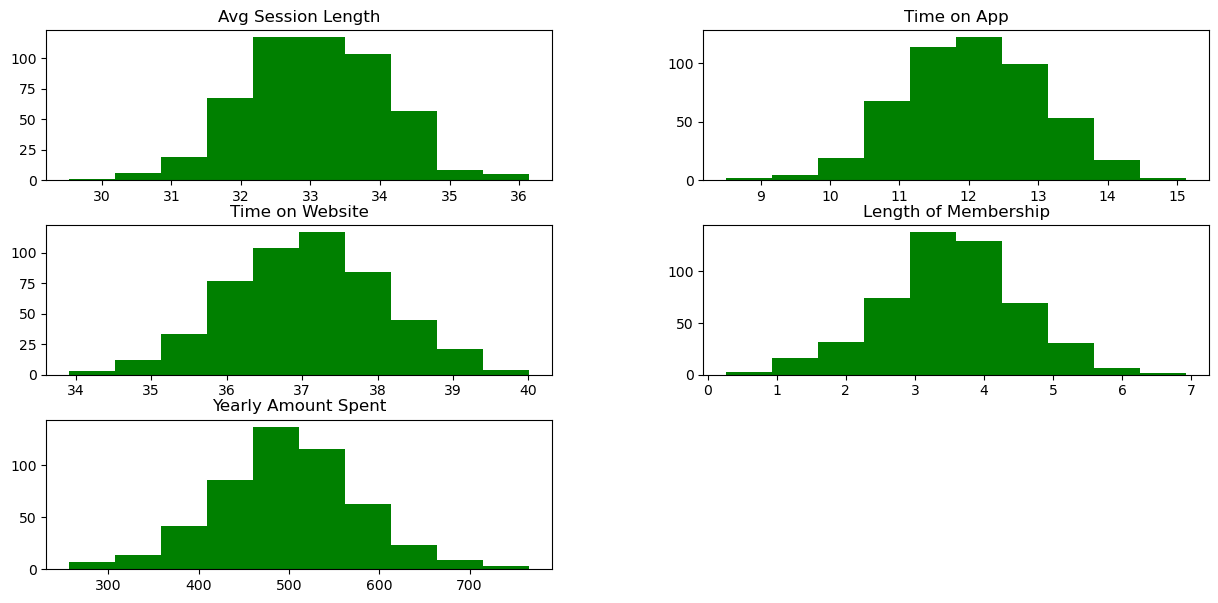

In [11]:
df_num.hist(grid=False, color='green',figsize=(15,7))

In [25]:
df_scale = ((df_num - df_num.mean())/(df_num.max() - df_num.min()))
df_scale.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,0.218560,0.091128,0.413246,0.082546,0.174192
1,-0.170559,-0.142476,0.034231,-0.130686,-0.210493
2,-0.007912,-0.109114,0.008233,0.085841,-0.023124
3,0.189544,0.251558,-0.055680,-0.062122,0.162206
4,0.041996,0.112210,0.078178,0.137213,0.196703


array([[<Axes: title={'center': 'Avg Session Length'}>,
        <Axes: title={'center': 'Time on App'}>],
       [<Axes: title={'center': 'Time on Website'}>,
        <Axes: title={'center': 'Length of Membership'}>],
       [<Axes: title={'center': 'Yearly Amount Spent'}>, <Axes: >]],
      dtype=object)

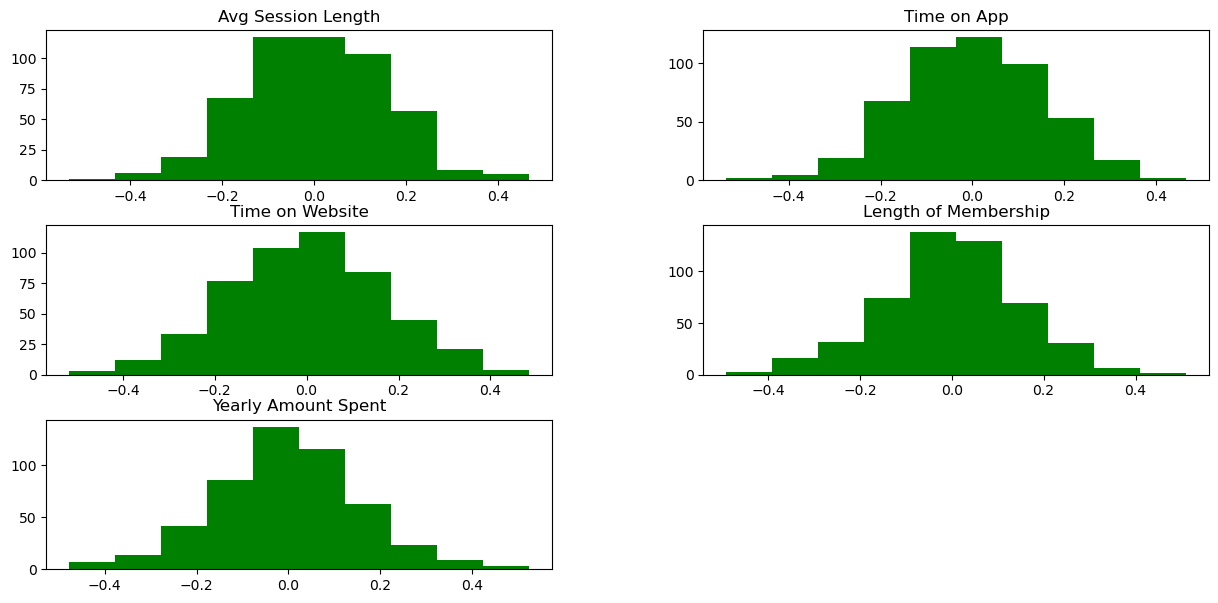

In [27]:
df_scale.hist(grid = False, color = 'green', figsize=(15,7))

<Axes: >

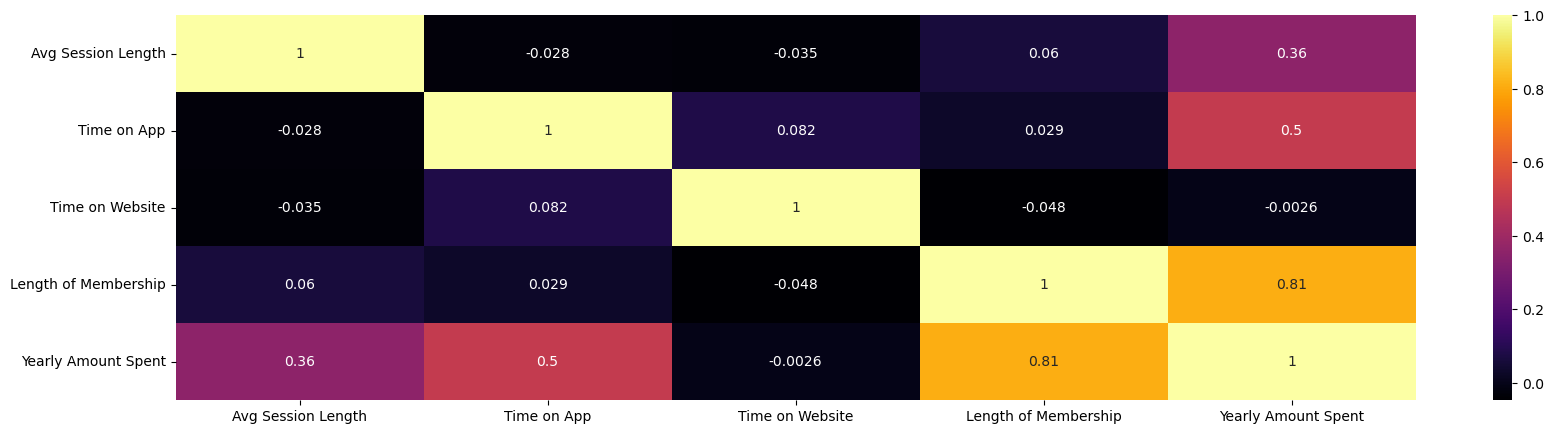

In [41]:
plt.figure(figsize=(20,5))
sns.heatmap(df_scale.corr(), annot=True, fmt='.2g', cmap='inferno')

Text(0, 0.5, 'Yearly Amount Spent')

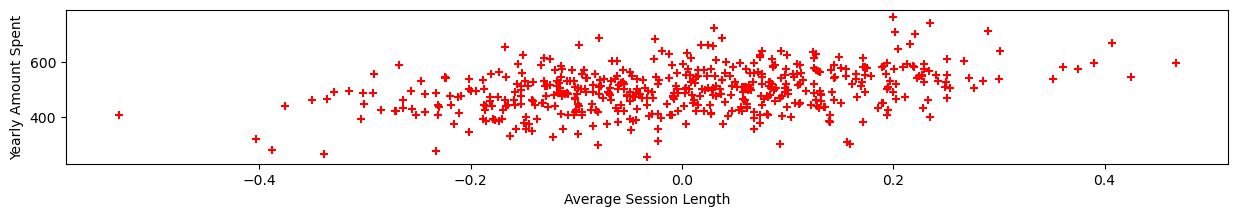

In [370]:
plt.figure(figsize=(15,2))
plt.scatter(df_scale['Avg Session Length'],df['Yearly Amount Spent'], marker='+', color='r')
plt.xlabel('Average Session Length')
plt.ylabel('Yearly Amount Spent')

Text(0, 0.5, 'Yearly Amount Spent')

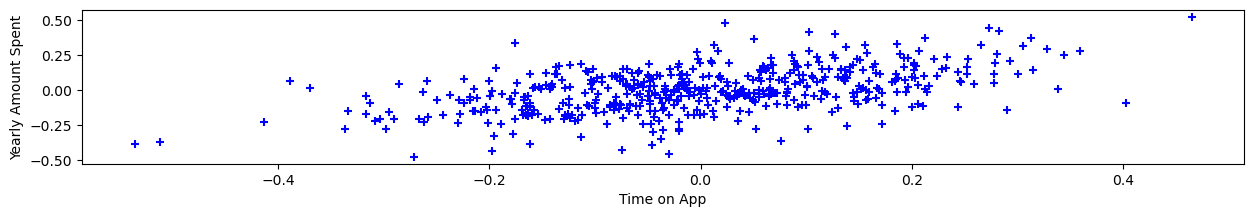

In [371]:
plt.figure(figsize=(15,2))
plt.scatter(df_scale['Time on App'],df_scale['Yearly Amount Spent'],marker='+',color='b')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')

Text(0, 0.5, 'Yearly Amount Spent')

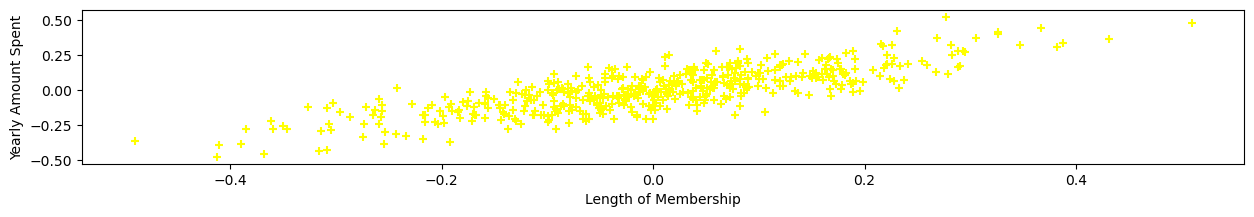

In [372]:
plt.figure(figsize=(15,2))
plt.scatter(df_scale['Length of Membership'],df_scale['Yearly Amount Spent'],marker='+',color='yellow')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')

Text(0, 0.5, 'Time on Website')

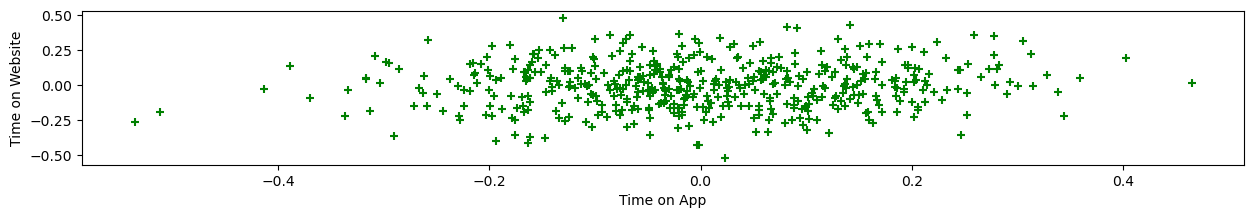

In [374]:
plt.figure(figsize=(15,2))
plt.scatter(df_scale['Time on App'], df_scale['Time on Website'],marker='+',color='g')
plt.xlabel('Time on App')
plt.ylabel('Time on Website')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


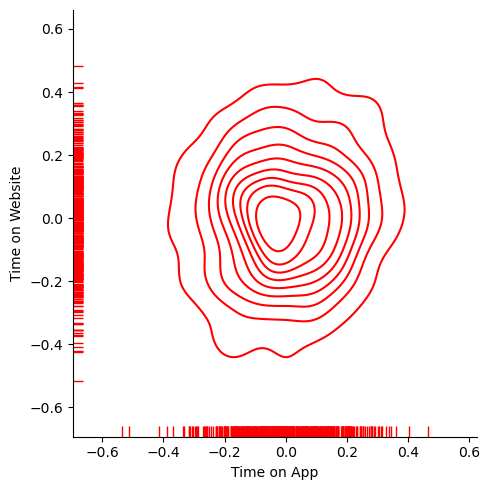

In [390]:
sns.displot(x = df_scale['Time on App'], y = df_scale['Time on Website'],kind='kde',rug=True, color='r')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


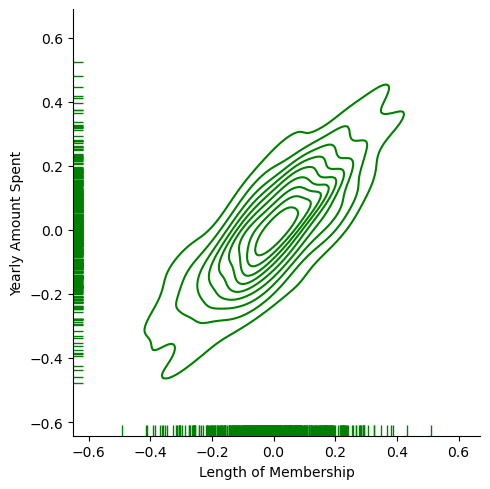

In [394]:
sns.displot(x=df_scale['Length of Membership'],y=df_scale['Yearly Amount Spent'],kind='kde',color='g',rug=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


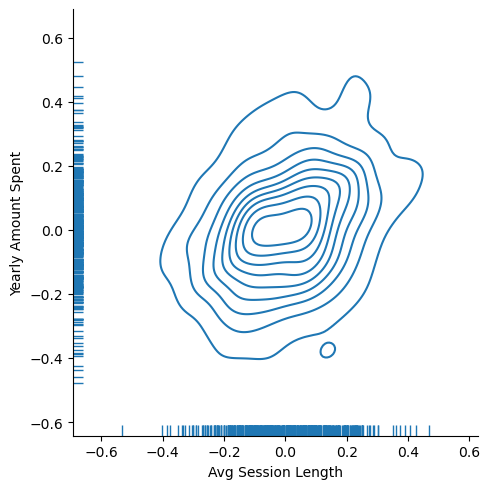

In [406]:
sns.displot(x=df_scale['Avg Session Length'],y=df_scale['Yearly Amount Spent'],kind='kde',rug=True)

In [154]:
predictor = df_scale.drop('Yearly Amount Spent', axis=1)
predictor.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership
0,0.218560,0.091128,0.413246,0.082546
1,-0.170559,-0.142476,0.034231,-0.130686
2,-0.007912,-0.109114,0.008233,0.085841
3,0.189544,0.251558,-0.055680,-0.062122
4,0.041996,0.112210,0.078178,0.137213


In [155]:
target = df_scale[['Yearly Amount Spent']]
target.head()

,Yearly Amount Spent
0,0.174192
1,-0.210493
2,-0.023124
3,0.162206
4,0.196703


In [156]:
x_train, x_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, random_state=1)

In [157]:
model1 = sm.OLS(y_train, x_train).fit()

In [158]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.982
Model:                             OLS   Adj. R-squared (uncentered):              0.982
Method:                  Least Squares   F-statistic:                              4754.
Date:                 Wed, 24 Jul 2024   Prob (F-statistic):                   7.20e-301
Time:                         20:42:54   Log-Likelihood:                          867.74
No. Observations:                  350   AIC:                                     -1727.
Df Residuals:                      346   BIC:                                     -1712.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg Session Length       0.3353      0.007     45.133      0.000       0.321       0.350
Time on App              0.5049      0.008     67.174      0.000       0.490       0.520
Time on Website          0.0035      0.006      0.549      0.583      -0.009       0.016
Length of Membership     0.8016      0.007    108.894      0.000       0.787       0.816
==============================================================================
Omnibus:                        0.418   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.811   Jarque-Bera (JB):                0.321
Skew:                          -0.072   Prob(JB):                        0.852
Kurtosis:                       3.034   Cond. No.                         1.25
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
predictions1 = model1.predict(x_test)
predictions1

304   -0.001721
340    0.039037
47     0.124341
67    -0.040846
479   -0.149090
         ...   
331    0.048194
197    0.282912
95     0.106025
122   -0.002059
23     0.008590
Length: 150, dtype: float64

In [160]:
y_test_ravel = np.ravel(y_test)
y_test_flatten = y_test_ravel.flatten()
y_test_flatten

array([-0.00909286,  0.00355402,  0.12647952, -0.05896296, -0.19091544,
        0.03181391, -0.03871339, -0.10145691,  0.03826771, -0.09874016,
       -0.04137172,  0.01419354,  0.14148326,  0.10668708,  0.3743232 ,
       -0.04014686, -0.38356934, -0.0626635 , -0.06955031, -0.07041209,
       -0.09351749, -0.35253202,  0.01339949, -0.18766811,  0.52315129,
       -0.15861577,  0.01597293, -0.02600112, -0.39412964,  0.17932409,
        0.0035103 , -0.21967139, -0.06989919, -0.37493777, -0.07374125,
        0.09622971,  0.23061165,  0.19670329,  0.01387807, -0.19314398,
        0.01162632,  0.11176686, -0.12328497,  0.11617071, -0.11250833,
       -0.10661704, -0.13087078,  0.02304175, -0.17318943, -0.15442015,
        0.09970277, -0.27798154,  0.27078507, -0.03099324, -0.10756038,
        0.22459617, -0.33157177, -0.04984629, -0.18003316,  0.07107573,
        0.18442125,  0.07361308,  0.14824309,  0.18661853, -0.16582358,
        0.16663496,  0.16113832, -0.04554365, -0.07020295,  0.07

In [161]:
def rmse(predictions, targets):
    differences = predictions - targets
    differences_squared = differences**2
    differences_squared_mean = differences_squared.mean()
    rmse_val = np.sqrt(differences_squared_mean)
    return rmse_val

In [162]:
rmse(predictions1,y_test_flatten)

0.01759084687715315

In [163]:
cols = ['Model','R_Squared','Adjusted_R_Squared','RMSE']
model1_report = pd.DataFrame(columns=cols)

In [164]:
model1_rep = pd.Series({'Model':'Model1',
                       'R_Squared':model1.rsquared,
                       'Adjusted_R_Squared':model1.rsquared_adj,
                       'RMSE':rmse(predictions1,y_test_flatten)})

In [165]:
model1_report = model1_report.append(model1_rep,ignore_index=True)
model1_report

C:\Users\Admin\AppData\Local\Temp\ipykernel_13424\3115220625.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model1_report = model1_report.append(model1_rep,ignore_index=True)


,Model,R_Squared,Adjusted_R_Squared,RMSE
0,Model1,0.982128,0.981922,0.017591


In [193]:
predictor_new = predictor.drop(['Time on Website'], axis=1)
predictor_new.head()

,Avg Session Length,Time on App,Length of Membership
0,0.218560,0.091128,0.082546
1,-0.170559,-0.142476,-0.130686
2,-0.007912,-0.109114,0.085841
3,0.189544,0.251558,-0.062122
4,0.041996,0.112210,0.137213


In [194]:
x_train, x_test, y_train, y_test = train_test_split(predictor_new, target, test_size=0.3, random_state=1)

In [195]:
model2 = sm.OLS(y_train,x_train).fit()

In [196]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.982
Model:                             OLS   Adj. R-squared (uncentered):              0.982
Method:                  Least Squares   F-statistic:                              6351.
Date:                 Wed, 24 Jul 2024   Prob (F-statistic):                   9.67e-303
Time:                         20:46:04   Log-Likelihood:                          867.58
No. Observations:                  350   AIC:                                     -1729.
Df Residuals:                      347   BIC:                                     -1718.
Df Model:                            3                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg Session Length       0.3353      0.007     45.184      0.000       0.321       0.350
Time on App              0.5053      0.007     67.588      0.000       0.491       0.520
Length of Membership     0.8013      0.007    109.204      0.000       0.787       0.816
==============================================================================
Omnibus:                        0.395   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.821   Jarque-Bera (JB):                0.322
Skew:                          -0.074   Prob(JB):                        0.851
Kurtosis:                       3.018   Cond. No.                         1.09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
predictions2 = model2.predict(x_test)

In [198]:
y_test_ravel = np.ravel(y_test)

In [199]:
def rmse(predictions, targets):
    differences = predictions-targets
    differences_squared = differences**2
    mean_differences_sqaured = differences_squared.mean()
    rmse_val = np.sqrt(mean_differences_sqaured)
    return rmse_val

In [200]:
rmse(predictions2, y_test_ravel)

0.01763214997119105

In [201]:
cols = ['Model','R_Squared','Adjusted_R_Squared','RMSE']
model2_report = pd.DataFrame(columns=cols)

In [202]:
model2_rep = pd.Series({'Model':'Model2',
                       'R_Squared':model2.rsquared,
                       'Adjusted_R_Squared':model2.rsquared_adj,
                       'RMSE':rmse(predictions2,y_test_ravel)})

In [203]:
model2_report = model2_report.append(model2_rep,ignore_index=True)
model2_report

C:\Users\Admin\AppData\Local\Temp\ipykernel_13424\1547645522.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model2_report = model2_report.append(model2_rep,ignore_index=True)


,Model,R_Squared,Adjusted_R_Squared,RMSE
0,Model2,0.982113,0.981958,0.017632


### Linear Regression using linear model

In [253]:
x_train,x_test,y_train,y_test = train_test_split(predictor,target,test_size=0.3,random_state=1)

In [254]:
Lr = LinearRegression()

In [255]:
model3 = Lr.fit(x_train,y_train)

In [256]:
y_pred3 = model3.predict(x_test)

In [257]:
model3.coef_

array([[0.33536762, 0.50480834, 0.0033727 , 0.80151233]])

In [258]:
model3.intercept_

array([0.00071821])

In [259]:
model3.score(x_test,y_test)

0.9884637235175601

In [260]:
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
rmse

0.017676161677588342

In [261]:
model3.rank_ 
#There are 4 independent features in our predictor and the model rank is 4 which means all 4 features are useful in effectively predicting the results

4

### Decision Tree Regressor

In [315]:
Dt = DecisionTreeRegressor(criterion='squared_error',min_samples_split=5,min_samples_leaf=5, max_depth=50,random_state=1)
model4 = Dt.fit(x_train,y_train)

In [306]:
y_pred4 = model4.predict(x_test)

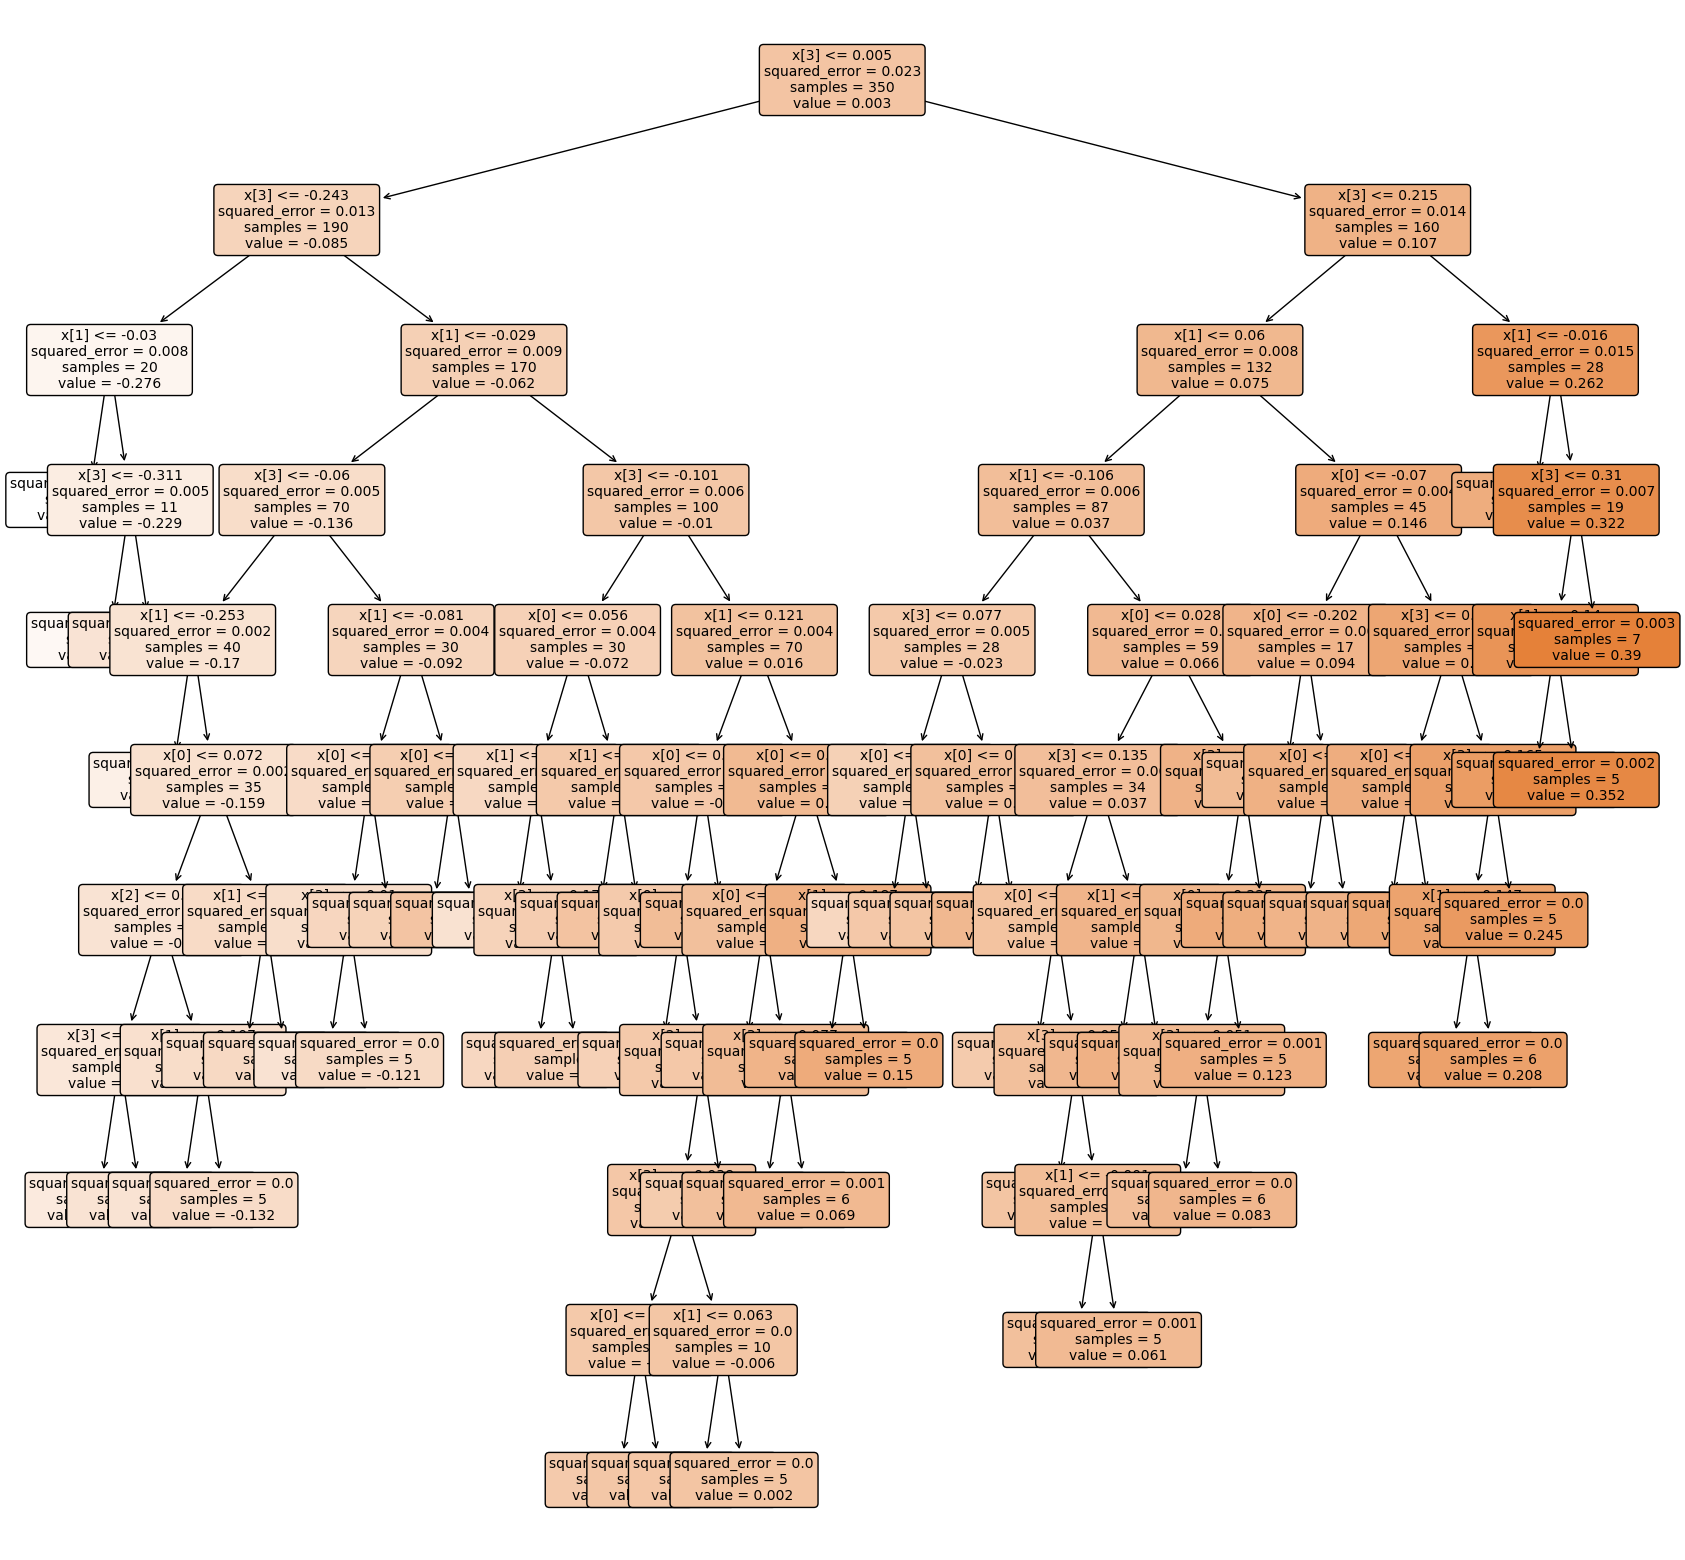

In [307]:
plt.figure(figsize=(20,20))
plot_tree(model4,filled=True,rounded=True, fontsize=10)
plt.show()

In [308]:
model4.score(x_test,y_test)

0.864985908708422

### Using Grid Search to finnd best parameters

In [316]:
grid_search_parameters = {'criterion':['absolute_error', 'friedman_mse', 'poisson', 'squared_error'],
                          'min_samples_split':[2,4,6,8,10,12,14,16,18,20],
                          'max_depth': [None,2,3,5,7,10,15,20],
                         'min_samples_leaf': [1,5],
                          'max_leaf_nodes':[None],
                         }

In [327]:
model4_grid= GridSearchCV(Dt, grid_search_parameters, cv = 10)

In [328]:
model4_grid.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1600 fits failed out of a total of 6400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1320, in fit
    super()._fit(

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_depth=50, min_samples_leaf=5,
                                             min_samples_split=5,
                                             random_state=1),
             param_grid={'criterion': ['absolute_error', 'friedman_mse',
                                       'poisson', 'squared_error'],
                         'max_depth': [None, 2, 3, 5, 7, 10, 15, 20],
                         'max_leaf_nodes': [None], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20]})

In [329]:
model4_grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [336]:
Dt1 = DecisionTreeRegressor(criterion='friedman_mse',max_depth=None,max_leaf_nodes=None,min_samples_leaf=1,min_samples_split=6)
model5 = Dt1.fit(x_train,y_train)

In [338]:
model5.score(x_test,y_test)

0.8449636686348874

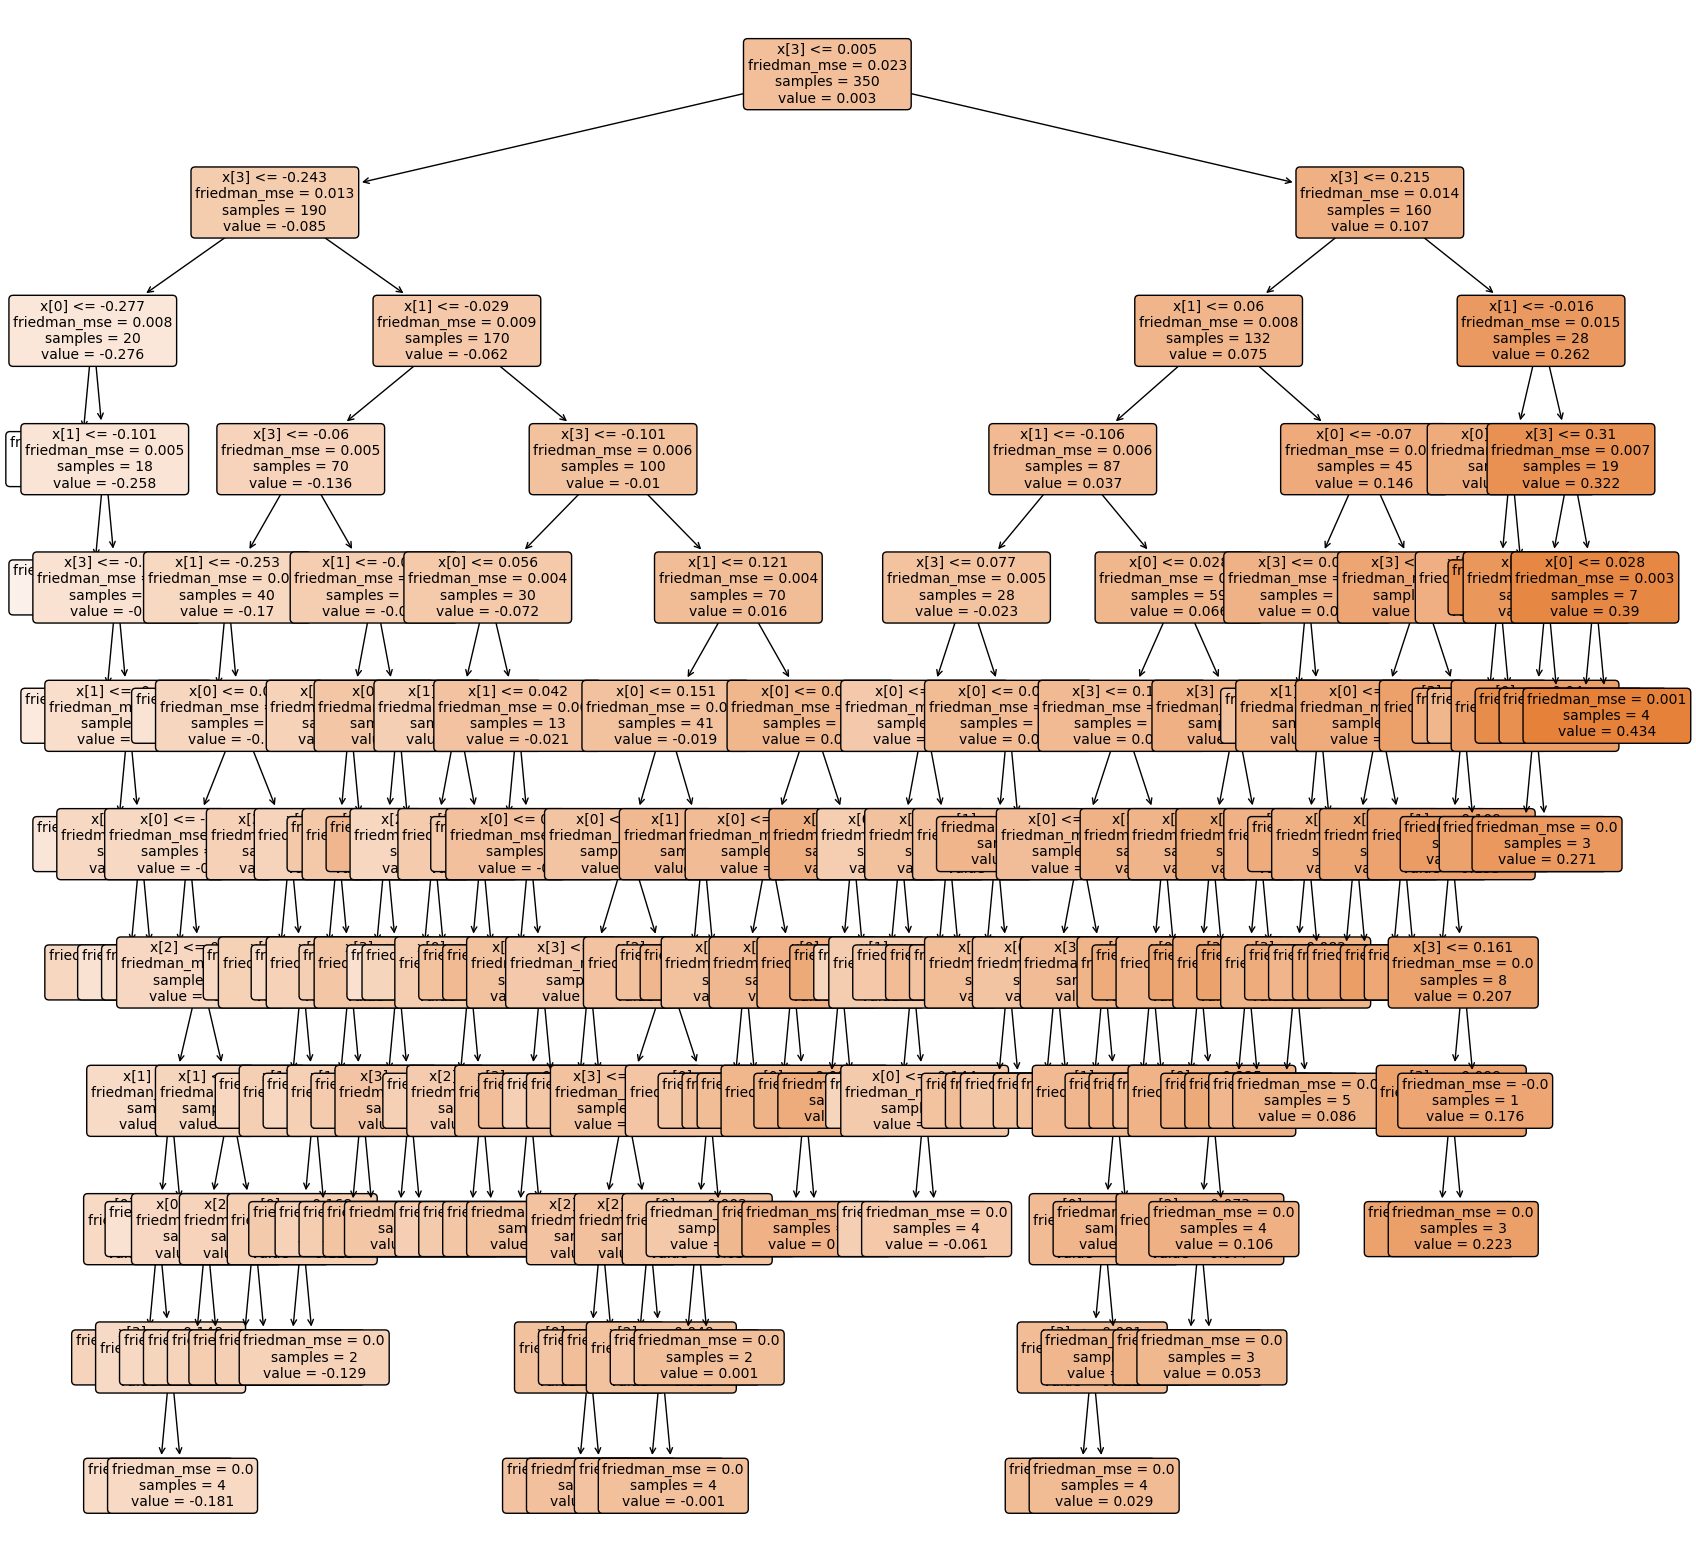

In [339]:
plt.figure(figsize=(20,20))
plot_tree(model5,filled=True,rounded=True, fontsize=10)
plt.show()

### Random Forest Regressor

In [340]:
Rf = RandomForestRegressor()
model6 = Rf.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [341]:
model6.score(x_test,y_test)

0.9250952479779462

In [343]:
y_pred6 = model6.predict(x_test)
mse = mean_squared_error(y_pred6,y_test)
rmse = np.sqrt(mse)
rmse

0.04504118651487109

### Support Vector Regressor

In [344]:
sv = SVR()

In [345]:
model7 =  sv.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [349]:
y_pred7 = model7.predict(x_test)

In [350]:
model7.score(x_test,y_test)

0.8669688934342823

In [351]:
mse = mean_squared_error(y_pred7,y_test)
rmse = np.sqrt(mse)
rmse

0.06002494061566318

### Conclusion - All independent features except for 'Time on Website' are significant and 'Length of Membership' has the highest impact on 'Yearly amount spent'. Linear Regression and Random Forest Regressor are the best algorithms in our case with a model score of 98.8 and 92.5